In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pla
import matplotlib as mpl

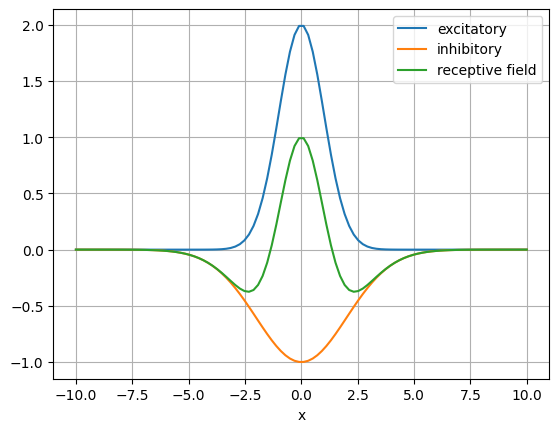

In [70]:
x = np.linspace(-10, 10, 100)

def exite(x):
    return 2 * np.exp(-0.5 * np.power(x, 2))

def inhibit(x):
    return - np.exp(-1/2 * np.power(x, 2) * 1/4 )

def receptive_field(x):
    return exite(x) + inhibit(x)

y_1 = exite(x)
y_2 = inhibit(x)
rf = receptive_field(x)
plt.plot(x, y_1, label="excitatory")
plt.plot(x, y_2, label="inhibitory")
plt.plot(x, rf, label="receptive field")
plt.xlabel("x")
plt.grid()
plt.legend()


-31353.056050219446

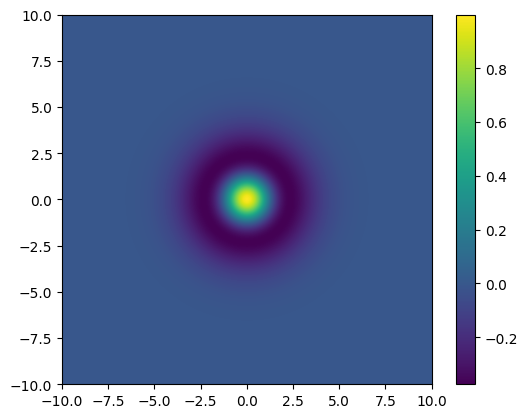

In [71]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x, y)

radius = np.linalg.norm(np.stack([X, Y]), axis=0)

rf = receptive_field(radius)

left = -10
right = 10
bottom = -10
top = 10
extent = [left, right, bottom, top]

fig, ax = plt.subplots()
image = ax.imshow(rf, extent=extent)
fig.colorbar(image)


rf.sum()

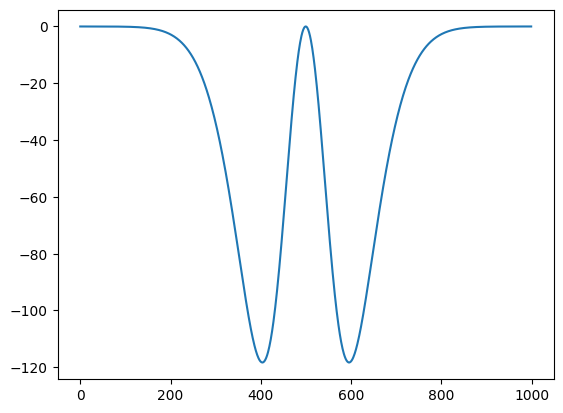

In [17]:
plt.plot(rf.sum(axis=0))

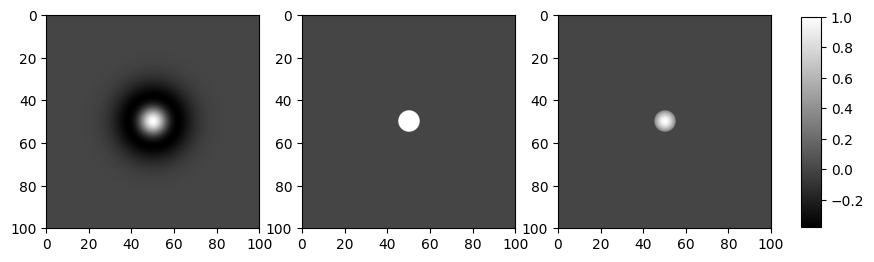

In [11]:
stimulus_radius = 1
stimulus = np.zeros_like(rf)
stimulus[np.where(radius <= stimulus_radius)] = 1

response = rf * stimulus

stack = np.stack([rf, stimulus, response])

minmin = np.min(stack)
maxmax = np.max(stack)

fig, axs = plt.subplots(1, 3, figsize=(10, 30))
axs[0].imshow(rf, extent=extent, vmin=minmin, vmax=maxmax, cmap=mpl.colormaps["gray"])
axs[1].imshow(stimulus, extent=extent ,vmin=minmin, vmax=maxmax, cmap=mpl.colormaps["gray"])
im2 = axs[2].imshow(response, extent=extent, vmin=minmin, vmax=maxmax, cmap=mpl.colormaps["gray"])

fig.subplots_adjust(right=0.85)
cbar_ax =  fig.add_axes([0.88, 0.46, 0.02, 0.07])
fig.colorbar(im2, cbar_ax)

(1.3663663663663663, 1.3595559868917453)

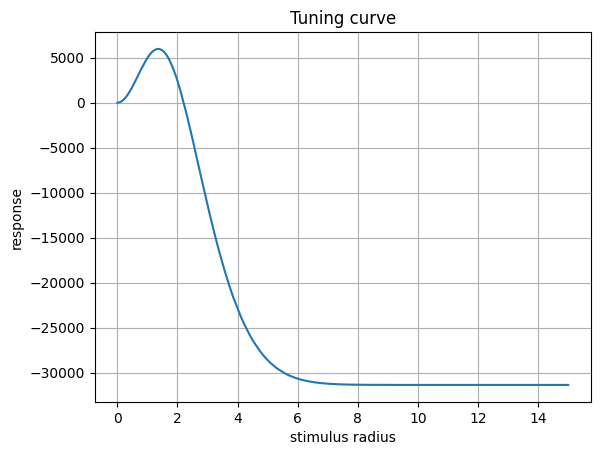

In [18]:

r_array = np.linspace(0, 15, 1000) 
response = np.empty_like(r_array)
for idx, r in enumerate(r_array):
    stimulus = np.zeros_like(rf)
    stimulus[np.where(radius <= r)] = 1
    
    response[idx] = (stimulus * rf).sum()

fig, ax = plt.subplots()
ax.set_title("Tuning curve")
ax.plot(r_array, response)
ax.set_xlabel("stimulus radius")
ax.set_ylabel("response")
ax.grid()

r_array[np.argmax(response)], 2 * np.sqrt(2/3 * np.log(2))

0.5001417065261804

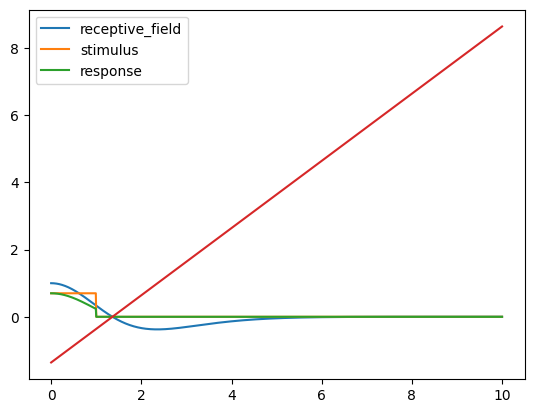

In [13]:
fig, axs = plt.subplots()

r = np.linspace(0, 10, 1000)
rf = receptive_field(r)
s = np.zeros_like(rf)
s[np.where(np.abs(r) <= 1)] = 0.7

axs.plot(r, rf, label="receptive_field")
axs.plot(r, s, label="stimulus")
axs.plot(r, rf * s, label="response")
# axs.plot(r, r - 2 * np.sqrt(2/3 * np.log(2)))
axs.legend()

rf.sum()

(1.081274256771003e-05,
 5.406371282878908e-06,
 0.4999999999999998,
 -1.9287498479639178e-22)

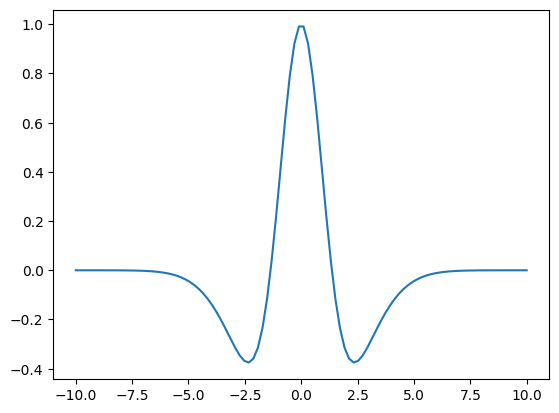

In [72]:
x_0 = np.linspace(-10, 10, 100)
rf_0 = receptive_field(x_0)

x_1 = np.linspace(0, 10, 50)
rf_1 = receptive_field(x_1)

plt.plot(x_0, rf_0)
# plt.plot(x_1, rf_1)
rf_0.sum(), rf_0[:int(len(rf_0)/2)].sum(), rf_1.sum(), rf_1[-1]


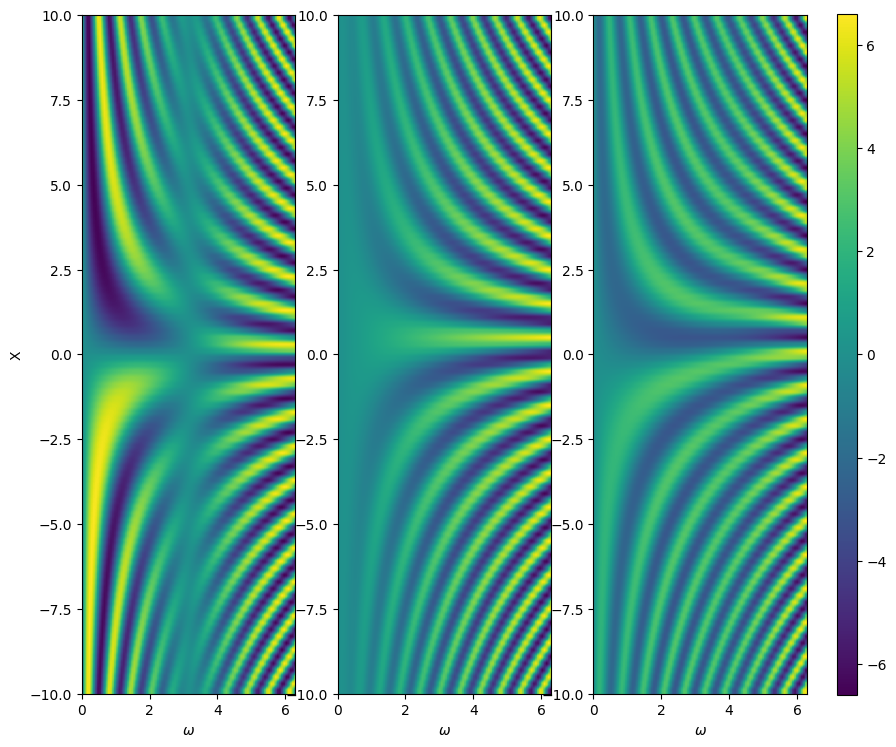

In [68]:
x = np.linspace(-10,10, 100)
omega = np.linspace(0, 2 * np.pi, 100)

X, Omega = np.meshgrid(x, omega)

e_4 = np.sin(Omega * (X + 0.5)) + np.sin(Omega * (X - 1 + 0.5))
dI_4 = Omega * np.cos(Omega * (X + 0.5))

fig, axs = plt.subplots(1, 3, figsize=(10, 30))
axs[0].imshow(e_4.T, extent=[ 0, 2*np.pi, -10, 10,])
axs[0].set_ylabel("X")
axs[0].set_xlabel(f"$\omega$")
axs[1].imshow(dI_4.T, extent=[ 0, 2*np.pi, -10, 10,])
axs[1].set_xlabel(f"$\omega$")
image = axs[2].imshow((e_4 - dI_4).T, extent=[ 0, 2*np.pi, -10, 10,])
axs[2].set_xlabel(f"$\omega$")

fig.subplots_adjust(right=0.85)
cbar_ax =  fig.add_axes([0.88, 0.3815, 0.02, 0.227])
fig.colorbar(image, cbar_ax)
